In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('transactions_n100000.csv')

In [3]:
df

,ticket_id,order_timestamp,location,item_name,item_count,lat,long
0,0x872a40,2019-02-28 18:33:00,4,shake,2,41.889047,-87.803605
1,0x872a40,2019-02-28 18:33:00,4,burger,2,41.889047,-87.803605
2,0x872a40,2019-02-28 18:33:00,4,fries,2,41.889047,-87.803605
3,0x598eb3,2019-09-18 11:59:00,5,burger,1,41.881818,-87.640234
4,0x598eb3,2019-09-18 11:59:00,5,salad,2,41.881818,-87.640234
...,...,...,...,...,...,...,...
260736,0x3c0582,2019-05-27 17:06:00,9,burger,3,41.524598,-87.849468
260737,0x3c0582,2019-05-27 17:06:00,9,salad,1,41.524598,-87.849468
260738,0x3c0582,2019-05-27 17:06:00,9,fries,4,41.524598,-87.849468
260739,0x104597,2019-12-10 00:25:00,2,burger,3,42.049306,-87.677606


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260741 entries, 0 to 260740
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ticket_id        260741 non-null  object 
 1   order_timestamp  260741 non-null  object 
 2   location         260741 non-null  int64  
 3   item_name        260741 non-null  object 
 4   item_count       260741 non-null  int64  
 5   lat              260741 non-null  float64
 6   long             260741 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ MB


## process items

In [5]:
#calculate the number of items for each ticket
df2 = pd.pivot_table(df, index= 'ticket_id', columns ='item_name', values='item_count', aggfunc = np.sum)

In [6]:
df2

item_name,burger,fries,salad,shake
ticket_id,,,,
0x100048,NaN,3.0,3.0,NaN
0x100057,1.0,1.0,NaN,NaN
0x1000ba,1.0,2.0,1.0,1.0
0x1000fb,4.0,5.0,1.0,4.0
0x10016e,3.0,3.0,NaN,3.0
...,...,...,...,...
0xffddf,3.0,3.0,NaN,3.0
0xffe25,2.0,2.0,NaN,NaN
0xffec9,NaN,1.0,1.0,NaN


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0x100048 to 0xfffac
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   burger  76114 non-null   float64
 1   fries   100000 non-null  float64
 2   salad   38344 non-null   float64
 3   shake   46283 non-null   float64
dtypes: float64(4)
memory usage: 3.8+ MB


In [8]:
df.drop_duplicates(subset=['ticket_id', 'order_timestamp', 'location', 'lat', 'long'], inplace=True)

In [9]:
data=pd.merge(df2, df[['ticket_id', 'order_timestamp', 'location', 'lat', 'long']], on='ticket_id', how='left')

In [10]:
#replace na with 0
data.fillna(0, inplace=True)

In [11]:
data.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long
0,0x100048,0.0,3.0,3.0,0.0,2019-03-29 12:24:00,1,41.880844,-87.630524
1,0x100057,1.0,1.0,0.0,0.0,2019-11-24 00:24:00,6,41.784576,-87.607565
2,0x1000ba,1.0,2.0,1.0,1.0,2019-02-09 12:02:00,5,41.881818,-87.640234
3,0x1000fb,4.0,5.0,1.0,4.0,2019-08-31 19:28:00,4,41.889047,-87.803605
4,0x10016e,3.0,3.0,0.0,3.0,2019-09-13 17:07:00,7,41.794132,-88.010140


## process date

In [12]:
data['order_timestamp'] = pd.to_datetime(data['order_timestamp'])
data['dayofweek'] = data['order_timestamp'].dt.day_name()
data['month'] = data['order_timestamp'].dt.month
data['day'] = data['order_timestamp'].dt.day
data['hour'] = data['order_timestamp'].dt.hour
data.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dayofweek,month,day,hour
0,0x100048,0.0,3.0,3.0,0.0,2019-03-29 12:24:00,1,41.880844,-87.630524,Friday,3,29,12
1,0x100057,1.0,1.0,0.0,0.0,2019-11-24 00:24:00,6,41.784576,-87.607565,Sunday,11,24,0
2,0x1000ba,1.0,2.0,1.0,1.0,2019-02-09 12:02:00,5,41.881818,-87.640234,Saturday,2,9,12
3,0x1000fb,4.0,5.0,1.0,4.0,2019-08-31 19:28:00,4,41.889047,-87.803605,Saturday,8,31,19
4,0x10016e,3.0,3.0,0.0,3.0,2019-09-13 17:07:00,7,41.794132,-88.010140,Friday,9,13,17


## process location

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

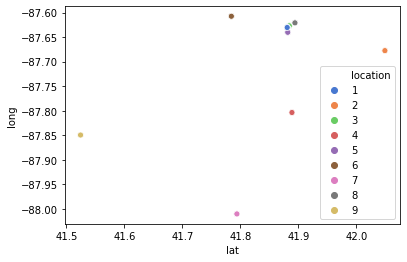

In [14]:
ax = sns.scatterplot(x="lat", y="long", data=data, hue='location',palette="muted")

plt.show()

In [15]:
data['central'] = 0
data['sub'] = 0
data['out'] = 0


for index,row in data.iterrows():
    if row['location'] in [1,5,8,3]:
        data.at[index, 'central'] = 1
    elif row['location'] in [2,4,6]:
        data.at[index, 'sub'] = 1
    elif row['location'] in [7,9]:
        data.at[index, 'out'] = 1

data.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dayofweek,month,day,hour,central,sub,out
0,0x100048,0.0,3.0,3.0,0.0,2019-03-29 12:24:00,1,41.880844,-87.630524,Friday,3,29,12,1,0,0
1,0x100057,1.0,1.0,0.0,0.0,2019-11-24 00:24:00,6,41.784576,-87.607565,Sunday,11,24,0,0,1,0
2,0x1000ba,1.0,2.0,1.0,1.0,2019-02-09 12:02:00,5,41.881818,-87.640234,Saturday,2,9,12,1,0,0
3,0x1000fb,4.0,5.0,1.0,4.0,2019-08-31 19:28:00,4,41.889047,-87.803605,Saturday,8,31,19,0,1,0
4,0x10016e,3.0,3.0,0.0,3.0,2019-09-13 17:07:00,7,41.794132,-88.010140,Friday,9,13,17,0,0,1


## onehotenconder

In [16]:
data['hour'].unique()

array([12,  0, 19, 17, 20, 23, 11, 18, 13,  1, 16, 15, 14, 21, 22])

In [17]:
#create dummy variable for hour
data['11-13'] = 0
data['14-16'] = 0
data['17-19'] = 0
data['20-22'] = 0
data['23-1'] = 0

for index,row in data.iterrows():
    if row['hour'] in [11,12,13]:
        data.at[index, '11-13'] = 1
    elif row['hour'] in [14,15,16]:
        data.at[index, '14-16'] = 1
    elif row['hour'] in [17,18,19]:
        data.at[index, '17-19'] = 1
    elif row['hour'] in [20,21,22]:
        data.at[index, '20-22'] = 1
    elif row['hour'] in [23,0,1]:
        data.at[index, '23-1'] = 1

data.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dayofweek,...,day,hour,central,sub,out,11-13,14-16,17-19,20-22,23-1
0,0x100048,0.0,3.0,3.0,0.0,2019-03-29 12:24:00,1,41.880844,-87.630524,Friday,...,29,12,1,0,0,1,0,0,0,0
1,0x100057,1.0,1.0,0.0,0.0,2019-11-24 00:24:00,6,41.784576,-87.607565,Sunday,...,24,0,0,1,0,0,0,0,0,1
2,0x1000ba,1.0,2.0,1.0,1.0,2019-02-09 12:02:00,5,41.881818,-87.640234,Saturday,...,9,12,1,0,0,1,0,0,0,0
3,0x1000fb,4.0,5.0,1.0,4.0,2019-08-31 19:28:00,4,41.889047,-87.803605,Saturday,...,31,19,0,1,0,0,0,1,0,0
4,0x10016e,3.0,3.0,0.0,3.0,2019-09-13 17:07:00,7,41.794132,-88.010140,Friday,...,13,17,0,0,1,0,0,1,0,0


In [18]:
#create dummy variable for location
location=pd.get_dummies(data['location'])

In [19]:
data2=pd.concat([data,location],axis=1)

In [20]:
data2.head()

,ticket_id,burger,fries,salad,shake,order_timestamp,location,lat,long,dayofweek,...,23-1,1,2,3,4,5,6,7,8,9
0,0x100048,0.0,3.0,3.0,0.0,2019-03-29 12:24:00,1,41.880844,-87.630524,Friday,...,0,1,0,0,0,0,0,0,0,0
1,0x100057,1.0,1.0,0.0,0.0,2019-11-24 00:24:00,6,41.784576,-87.607565,Sunday,...,1,0,0,0,0,0,1,0,0,0
2,0x1000ba,1.0,2.0,1.0,1.0,2019-02-09 12:02:00,5,41.881818,-87.640234,Saturday,...,0,0,0,0,0,1,0,0,0,0
3,0x1000fb,4.0,5.0,1.0,4.0,2019-08-31 19:28:00,4,41.889047,-87.803605,Saturday,...,0,0,0,0,1,0,0,0,0,0
4,0x10016e,3.0,3.0,0.0,3.0,2019-09-13 17:07:00,7,41.794132,-88.010140,Friday,...,0,0,0,0,0,0,0,1,0,0


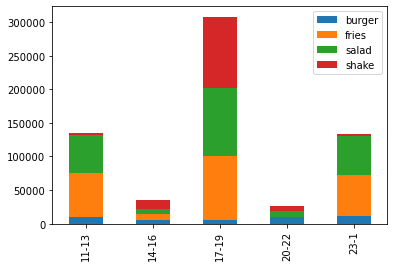

In [21]:
o1 = data[data["11-13"]==1]
from pandas import Series,DataFrame
x={'11-13':{'burger':o1.burger.sum(),'fries':o1.fries.sum(),'salad':o1.salad.sum(), 'shake':o1.shake.sum()}}
d=DataFrame(x)
o2=data[data["14-16"]==1]
o3=data[data["17-19"]==1]
o4=data[data["20-22"]==1]
o5=data[data["23-1"]==1]
d['14-16']={o2.burger.sum(),o2.fries.sum(),o2.salad.sum(), o2.shake.sum()}
d['17-19']={o3.burger.sum(),o3.fries.sum(),o3.salad.sum(), o3.shake.sum()}
d['20-22']={o4.burger.sum(),o4.fries.sum(),o4.salad.sum(), o4.shake.sum()}
d['23-1']={o5.burger.sum(),o5.fries.sum(),o5.salad.sum(), o5.shake.sum()}
d=d.transpose()
d.plot(kind='bar', stacked=True)

In [84]:
## create dummy variable for day of week
dayofweek=pd.get_dummies(data['dayofweek'])
data3=pd.concat([data2,dayofweek],axis=1)

In [85]:
data3['location'].unique()

array([1, 6, 5, 4, 7, 9, 8, 2, 3])

In [86]:
data3.columns

Index([      'ticket_id',          'burger',           'fries',
                 'salad',           'shake', 'order_timestamp',
              'location',             'lat',            'long',
             'dayofweek',           'month',             'day',
                  'hour',         'central',             'sub',
                   'out',           '11-13',           '14-16',
                 '17-19',           '20-22',            '23-1',
                       1,                 2,                 3,
                       4,                 5,                 6,
                       7,                 8,                 9,
                'Friday',          'Monday',        'Saturday',
                'Sunday',        'Thursday',         'Tuesday',
             'Wednesday'],
      dtype='object')

## clustering1

items + hour dummy + location dummy

In [87]:
d1=data2[['burger','fries','salad','shake','11-13','14-16','17-19','20-22','23-1',1,2,3,4,5,6,7,8,9]]

In [88]:
from sklearn.cluster import KMeans

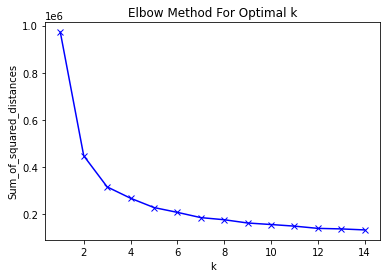

In [89]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d1)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [90]:
Sum_of_squared_distances

[971683.7126499035,
 447789.67216233996,
 315784.2750965273,
 267671.81109172397,
 228162.714044569,
 207778.3621919038,
 185497.0113302219,
 176499.14209994677,
 162648.47903360453,
 156184.19752732452,
 149339.63908639943,
 139852.60816879495,
 137553.10802654567,
 133304.9422781882]

In [91]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(d1)

In [92]:
result = pd.DataFrame(kmeans.cluster_centers_, columns = ['burger','fries','salad','shake','11-13','14-16','17-19','20-22','23-1',1,2,3,4,5,6,7,8,9])

In [93]:
result.round(2)

,burger,fries,salad,shake,11-13,14-16,17-19,20-22,23-1,1,2,3,4,5,6,7,8,9
0,0.28,2.88,2.60,0.10,0.88,0.08,0.02,0.01,0.01,0.20,0.04,0.20,0.04,0.20,0.04,0.04,0.20,0.04
1,3.89,4.06,0.17,3.33,0.00,0.06,0.78,0.06,0.11,0.03,0.07,0.03,0.25,0.03,0.07,0.24,0.04,0.24
2,1.20,1.47,0.27,0.36,0.24,0.03,0.10,0.01,0.62,0.08,0.26,0.08,0.06,0.07,0.26,0.06,0.08,0.06


## clustering2：items + hour dummy + location group

In [94]:
d2 = data3[['burger','fries','salad','shake','11-13','14-16','17-19','20-22','23-1','central','sub','out']]

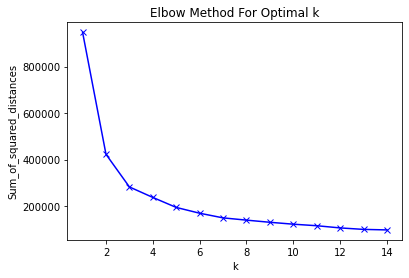

In [95]:
from sklearn.cluster import KMeans
Sum_of_squared_distances
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d2)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [96]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(d2)

In [97]:
Sum_of_squared_distances

[948084.1790702491,
 422521.7545561703,
 282019.23555797094,
 236811.154395503,
 193768.36283172364,
 168817.47964642703,
 148766.65092379128,
 139060.75330011756,
 129808.3714427933,
 121582.84446712873,
 114959.54554972766,
 105561.38733406915,
 99186.00034851219,
 96921.90166518201]

In [98]:
result = pd.DataFrame(kmeans.cluster_centers_, columns = ['burger','fries','salad','shake','11-13','14-16','17-19','20-22','23-1','central','sub','out'])
result.round(2)

,burger,fries,salad,shake,11-13,14-16,17-19,20-22,23-1,central,sub,out
0,3.90,4.07,0.17,3.42,0.00,0.06,0.79,0.06,0.09,0.13,0.37,0.50
1,0.28,2.32,2.03,0.10,0.88,0.08,0.02,0.01,0.01,0.80,0.11,0.08
2,1.52,1.58,0.06,0.45,0.05,0.02,0.12,0.01,0.80,0.15,0.73,0.13


### clustering3：items + hour dummy + location group + dayofweek

In [99]:
d3 = data3[['burger','fries','salad','shake','11-13','14-16','17-19','20-22','23-1','central','sub','out','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

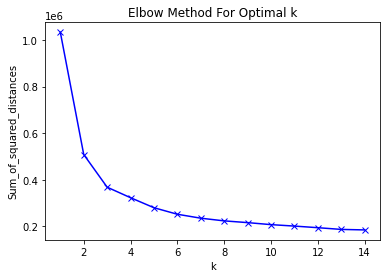

In [100]:
from sklearn.cluster import KMeans
Sum_of_squared_distances
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(d3)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [101]:
Sum_of_squared_distances

[1033798.0963698473,
 508234.5872996463,
 367760.75886632473,
 322513.06496135396,
 279478.7831522816,
 251425.50404631768,
 234475.69705229974,
 222952.31610552358,
 215479.95053145854,
 206805.20013551184,
 200587.09685546142,
 193656.1233687775,
 186278.8591142114,
 184108.83932082207]

In [102]:
kmeans = KMeans(n_clusters = 3, random_state=0).fit(d3)

In [103]:
result = pd.DataFrame(kmeans.cluster_centers_, columns = ['burger','fries','salad','shake','11-13','14-16','17-19','20-22','23-1','central','sub','out','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
result.round(2)

,burger,fries,salad,shake,11-13,14-16,17-19,20-22,23-1,central,sub,out,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,3.90,4.07,0.17,3.42,0.00,0.06,0.79,0.06,0.09,0.13,0.37,0.50,0.14,0.14,0.15,0.14,0.15,0.14,0.14
1,1.52,1.59,0.07,0.45,0.05,0.02,0.12,0.01,0.79,0.15,0.73,0.13,0.14,0.14,0.14,0.14,0.14,0.14,0.14
2,0.27,2.32,2.04,0.09,0.88,0.08,0.02,0.01,0.01,0.81,0.11,0.08,0.14,0.14,0.14,0.14,0.14,0.14,0.15


### Cluster 4: GMM

In [104]:
from sklearn.mixture import GaussianMixture

In [105]:
gmmModel = GaussianMixture(n_components=3, covariance_type='diag', random_state=0)
gmmModel.fit(d2)
labels = gmmModel.predict(d2)
print(labels)

[1 2 1 ... 1 2 0]


In [106]:
labels=pd.DataFrame(labels)
d2['Cluster']=labels


<ipython-input-106-7bb70ed2b986>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d2['Cluster']=labels


In [107]:
d2

,burger,fries,salad,shake,11-13,14-16,17-19,20-22,23-1,central,sub,out,Cluster
0,0.0,3.0,3.0,0.0,1,0,0,0,0,1,0,0,1
1,1.0,1.0,0.0,0.0,0,0,0,0,1,0,1,0,2
2,1.0,2.0,1.0,1.0,1,0,0,0,0,1,0,0,1
3,4.0,5.0,1.0,4.0,0,0,1,0,0,0,1,0,0
4,3.0,3.0,0.0,3.0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.0,3.0,0.0,3.0,0,0,1,0,0,0,1,0,0
99996,2.0,2.0,0.0,0.0,0,0,0,0,1,0,1,0,2
99997,0.0,1.0,1.0,0.0,1,0,0,0,0,1,0,0,1
99998,1.0,1.0,0.0,0.0,0,0,0,0,1,0,1,0,2


In [111]:
gmm_cluster = d2.groupby("Cluster").mean()
gmm_cluster.round(2)

,burger,fries,salad,shake,11-13,14-16,17-19,20-22,23-1,central,sub,out
Cluster,,,,,,,,,,,,
0,3.40,3.62,0.22,3.21,0.00,0.06,0.86,0.08,0.0,0.15,0.33,0.53
1,0.34,2.25,1.91,0.12,0.91,0.09,0.00,0.00,0.0,0.79,0.12,0.08
2,1.75,1.81,0.06,0.32,0.00,0.00,0.00,0.00,1.0,0.12,0.82,0.06
